#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
satisfaction = df['JobSatisfaction']
satisfaction.describe()

count    15253.000000
mean         7.000721
std          2.128648
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSatisfaction, dtype: float64

The scale seems to be from 0 to 10

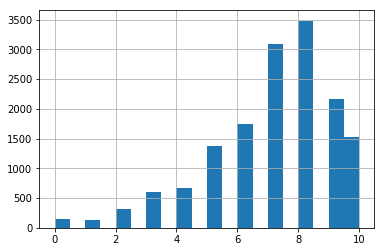

In [3]:
satisfaction.hist(bins=20)

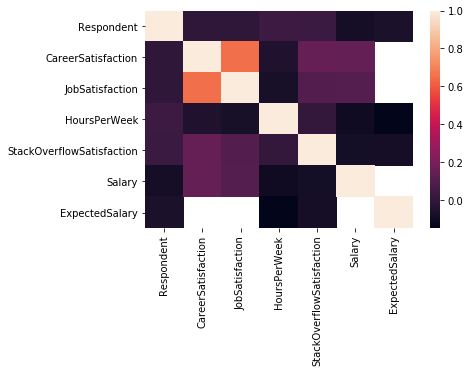

In [5]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

Of the numeric values, Job Satisfaction seems related with Career Satisfaction and ExpectedSalary. Not so much with actual Salary, which is weird.

In [7]:
satisfaction.isnull().sum() / satisfaction.shape[0]

0.20149722542142184

In [8]:
df['EmploymentStatus'].head()

0    Not employed, and not looking for work
1                        Employed part-time
2                        Employed full-time
3                        Employed full-time
4                        Employed full-time
Name: EmploymentStatus, dtype: object

In [12]:
df.groupby('EmploymentStatus')['JobSatisfaction'].mean()

EmploymentStatus
Employed full-time                                      6.980608
Employed part-time                                      6.846154
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.231985
Not employed, and not looking for work                       NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [17]:
df['CompanySize'].head()

0                         NaN
1          20 to 99 employees
2    10,000 or more employees
3    10,000 or more employees
4          10 to 19 employees
Name: CompanySize, dtype: object

In [20]:
satisf_by_size = df.groupby('CompanySize')['JobSatisfaction'].mean()
satisf_by_size

CompanySize
1,000 to 4,999 employees    6.908506
10 to 19 employees          7.035739
10,000 or more employees    6.793617
100 to 499 employees        7.029324
20 to 99 employees          6.997039
5,000 to 9,999 employees    6.832155
500 to 999 employees        7.029967
Fewer than 10 employees     7.025719
I don't know                7.054622
I prefer not to answer      7.284946
Name: JobSatisfaction, dtype: float64

In [22]:
sorted_values = [
    'Fewer than 10 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees'
]
satisf_by_size[sorted_values]

CompanySize
Fewer than 10 employees     7.025719
10 to 19 employees          7.035739
20 to 99 employees          6.997039
100 to 499 employees        7.029324
500 to 999 employees        7.029967
1,000 to 4,999 employees    6.908506
5,000 to 9,999 employees    6.832155
10,000 or more employees    6.793617
Name: JobSatisfaction, dtype: float64

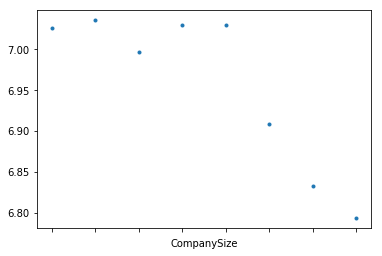

In [26]:
satisf_by_size[sorted_values].plot(style='.')

In [30]:
import re

cols = df.columns.tolist()
[re.match('.*obby.*', name).group(0) 
 for name in cols if re.match('.*obby.*', name) is not None]

['ProgramHobby']

In [32]:
df['ProgramHobby'].head()

0                    Yes, both
1                    Yes, both
2                    Yes, both
3                    Yes, both
4    Yes, I program as a hobby
Name: ProgramHobby, dtype: object

In [33]:
df['ProgramHobby'].value_counts()

Yes, I program as a hobby                    9260
Yes, both                                    5033
No                                           3661
Yes, I contribute to open source projects    1148
Name: ProgramHobby, dtype: int64

In [35]:
hobby = df.groupby('ProgramHobby')['JobSatisfaction'].mean()
hobby

ProgramHobby
No                                           6.874806
Yes, I contribute to open source projects    7.158649
Yes, I program as a hobby                    6.927150
Yes, both                                    7.189316
Name: JobSatisfaction, dtype: float64

hobby       7.034509
no hobby    7.000721
dtype: float64


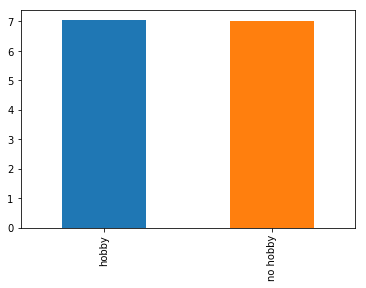

In [44]:
has_hobby = df[df['ProgramHobby'] != 'No']['JobSatisfaction'].mean()
no_hobby = df[df['ProgramHobby'] != 'Yes']['JobSatisfaction'].mean()
hnh = pd.Series([has_hobby, no_hobby], index=['hobby', 'no hobby'])
hnh.plot(kind='bar')
print(hnh)

In [48]:
cols

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [54]:
relevant_cols = ['HomeRemote',
                 'AssessJobCommute',
                 'AssessJobRemote',
                 'CollaborateRemote',
                ]
schema[schema.Column.isin(relevant_cols)]

,Column,Question
8,HomeRemote,How often do you work from home or remotely?
57,AssessJobCommute,When you're assessing potential jobs to apply ...
58,AssessJobRemote,When you're assessing potential jobs to apply ...
107,CollaborateRemote,It's harder to collaborate with remote peers t...


In [55]:
df['HomeRemote'].value_counts()

A few days each month                                      5876
Never                                                      5288
All or almost all the time (I'm full-time remote)          1922
Less than half the time, but at least one day each week    1464
More than half, but not all, the time                       676
It's complicated                                            633
About half the time                                         612
Name: HomeRemote, dtype: int64

In [65]:
sorted_remotes = [
    remote_satisf.index[6],
    remote_satisf.index[0],
    remote_satisf.index[4],
    remote_satisf.index[1],
    remote_satisf.index[5],
    remote_satisf.index[2]
]
remote_satisf = df.groupby('HomeRemote')['JobSatisfaction'].mean()
remote_satisf

HomeRemote
A few days each month                                      7.096694
About half the time                                        7.125737
All or almost all the time (I'm full-time remote)          7.405421
It's complicated                                           6.942053
Less than half the time, but at least one day each week    7.143786
More than half, but not all, the time                      6.973684
Never                                                      6.697127
Name: JobSatisfaction, dtype: float64

In [68]:
remote_satisf[sorted_remotes]

HomeRemote
Never                                                      6.697127
A few days each month                                      7.096694
Less than half the time, but at least one day each week    7.143786
About half the time                                        7.125737
More than half, but not all, the time                      6.973684
All or almost all the time (I'm full-time remote)          7.405421
Name: JobSatisfaction, dtype: float64

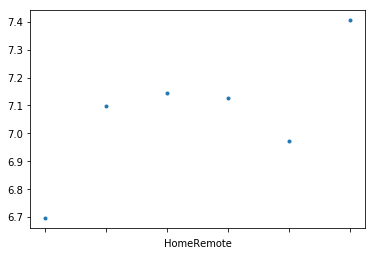

In [70]:
remote_satisf[sorted_remotes].plot(style='.')

In [71]:
df.FormalEducation.unique()

array(['Secondary school',
       "Some college/university study without earning a bachelor's degree",
       "Bachelor's degree", 'Doctoral degree', "Master's degree",
       'Professional degree', 'Primary/elementary school',
       'I prefer not to answer', 'I never completed any formal education'],
      dtype=object)

PhD       7.438492
no PhD    6.985762
dtype: float64


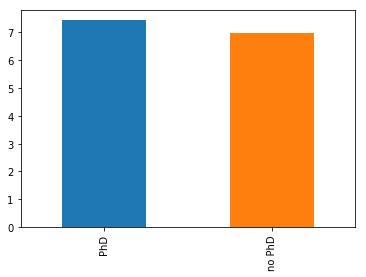

In [72]:
has_doctoral = df[df['FormalEducation'] == 'Doctoral degree']['JobSatisfaction'].mean()
no_doctoral = df[df['FormalEducation'] != 'Doctoral degree']['JobSatisfaction'].mean()
dnd = pd.Series([has_doctoral, no_doctoral], index=['PhD', 'no PhD'])
dnd.plot(kind='bar')
print(dnd)

#### Question 1

**1.** Use the space above to assist in matching each variable (**a**, **b**, **c**, **d**, **e**, **f**, **g**, or **h** ) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [25]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d,
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f 
            }
             
t.jobsat_check1(job_sol_1)

Nice job! That's what we found as well!


#### Question 2

**2.** Use the space above to assist in matching each variable (**a**, **b**, **c** ) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [77]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!
